# **PRÁCTICA 3: MODELOS CONEXIONISTAS - Perceptrón multicapa (I)**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

In [ ]:
# LIBRERÍAS A UTILIZAR
import numpy as np 
import itertools
import matplotlib.pyplot as plt
import math
import sklearn.preprocessing

In [ ]:
# FUNCIONES A UTILIZAR
def sigmoide(x):
    return 1/(1 + np.exp(-x))

def derv_sigmoide(x):
    return sigmoide(x) * (1-sigmoide(x))

# IMPLEMENTAMOS ALGORITMO DE RETROPROPAGACIÓN
def MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size):
    
    ## Definimos las matrices de pesos sinápticos (W)
    W1 = np.random.rand(hidden_size , input_size)    #(5x2) matriz de peso de la entrada para la primera capa oculta
    W2 = np.random.rand(hidden2_size, hidden_size)   #(5x5) matriz de peso de la primera capa oculta para la segunda capa oculta
    W3 = np.random.rand(output_size,  hidden2_size)  #(1x5) matriz de peso de la segunda capa oculta para la salida  

    ## Definimos las matrices de umbrales (b)
    b0 = np.random.rand(hidden_size,1)               #(5x1)
    b1 = np.random.rand(hidden2_size,1)              #(5x1)
    b2 = np.random.rand(1,output_size)               #(1x1)
    
    ## Listas    
    epoch_error = []   ## lista de errores de todas las épocas
    mse = []           ## lista del error cuadrático medio en cada época y las salidas de la última época.
    
    for epoch in range(epoch_count): #  Mira las columnas 
        error = []     ## lista de errores de una época
        salida = []    ## lista necesaria en el segundo ej
        
        for sample in range(len(X)): # Mira las filas
            
            # PASO 1: PROPAGAR (Forwardpropagation)
            
            ## Para detectar bien las matrices
            inputs = X[sample]
            inputs = inputs[:,np.newaxis]
            ## Evaluamos pirmera capa oculta
            y1 = np.dot(W1, inputs) + b0
            o1 = sigmoide(y1)
            ## Evaluamos segunda capa oculta
            y2 = np.dot(W2,o1) + b1
            o2 = sigmoide(y2)
            ## Evaluamos la salida
            y3 = np.dot(W3,o2) + b2
            o3 = sigmoide(y3)
            ## Adición segundo ejercicio 
            salida.append(o3)
            ## Guardamos el error de una época (target-predicted)^2
            error.append((o3 - y[sample])**2)
            error_sample =  y[sample] - o3
            
            # PASO 2: RETROPROPAGAR (Backpropagation)
            
            ## Procesamos las muestras secuencialemte.
            ## Calculamos los grandientes.
            delta3 = np.dot(error_sample, derv_sigmoide(y3))
            delta2 = np.multiply(np.dot(W3.T, delta3), derv_sigmoide(y2))
            delta1 = np.multiply(np.dot(W2.T, delta2), derv_sigmoide(y1))
            
            # PASO 3: ACTUALIZAR LOS PESOS 
            
            ## Actualizamos los pesos cada vez que se introduce una muestra de la entrada.
            W1 = W1 + mu * delta1 * inputs.T
            W2 = W2 + mu * delta2 * o1.T
            W3 = W3 + mu * delta3 * o2.T
            ## Actualizamos los beta cada vez que se introduce una muestra de la entrada.
            b0 = b0 + mu * delta1
            b1 = b1 + mu * delta2
            b2 = b2 + mu * delta3
        
        ## Guardamos el error de todas las épocas
        epoch_error.append(error)
        
    ## Calculamos el error cuadrático medio 
    mse = np.mean(epoch_error, axis = 1)
    
    ## Devolvemos el error cuadrático medio en cada época y las salidas de la última época.
    return mse, salida

1. Soluciona el problema la puerta XOR. Considera las entradas y salidas codificadas como ceros y unos. Usa 5 neuronas por capa y ejecuta 10,000 épocas con μ = 1. Prueba a cambiar el número de neuronas por capa y la μ.

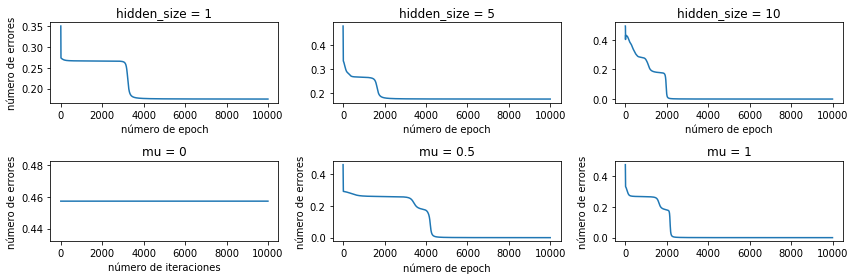

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

####################################################################################################
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.array(list(map(list, itertools.product([0, 1], repeat=2))))
y = np.array([[0],[1],[1],[0]])
# DEFINIMOS LAS VARIABLES 
mu = 1
epoch_count = 10000       ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 1           ## número de neuronas
hidden2_size = 1          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Conseguimos para sacar los arrays dentro de arrays que nos salen 
clf2 = [i[0][0] for i in clf]
axes[0,0].plot(clf2)
axes[0,0].set_title("hidden_size = 1")
axes[0,0].set_ylabel("número de errores")
axes[0,0].set_xlabel("número de epoch")
# Cambiamos mu
mu = 0
epoch_count = 10000       ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 5           ## número de neuronas
hidden2_size = 5          ## número de neuronas
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Conseguimos para sacar los arrays dentro de arrays que nos salen 
clf2 = [i[0][0] for i in clf]
axes[1,0].plot(clf2)
axes[1,0].set_title("mu = 0")
axes[1,0].set_ylabel("número de errores")
axes[1,0].set_xlabel("número de iteraciones")
####################################################################################################

mu = 1
epoch_count = 10000       ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 5           ## número de neuronas
hidden2_size = 5          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Conseguimos para sacar los arrays dentro de arrays que nos salen 
clf2 = [i[0][0] for i in clf]
axes[0,1].plot(clf2)
axes[0,1].set_title("hidden_size = 5")
axes[0,1].set_xlabel("número de epoch")
# Cambiamos mu
mu = 0.5
epoch_count = 10000       ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 5           ## número de neuronas
hidden2_size = 5          ## número de neuronas
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Conseguimos para sacar los arrays dentro de arrays que nos salen 
clf2 = [i[0][0] for i in clf]
axes[1,1].plot(clf2)
axes[1,1].set_title("mu = 0.5")
axes[1,1].set_ylabel("número de errores")
axes[1,1].set_xlabel("número de epoch")
####################################################################################################
 
mu = 1
epoch_count = 10000       ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 10           ## número de neuronas
hidden2_size = 10         ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Conseguimos para sacar los arrays dentro de arrays que nos salen 
clf2 = [i[0][0] for i in clf]
axes[0,2].plot(clf2)
axes[0,2].set_title("hidden_size = 10")
axes[0,2].set_xlabel("número de epoch")
# Cambiamos mu
mu = 1
epoch_count = 10000       ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 5           ## número de neuronas
hidden2_size = 5          ## número de neuronas
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Conseguimos para sacar los arrays dentro de arrays que nos salen 
clf2 = [i[0][0] for i in clf]
axes[1,2].plot(clf2)
axes[1,2].set_title("mu = 1")
axes[1,2].set_ylabel("número de errores")
axes[1,1].set_xlabel("número de epoch")
####################################################################################################

plt.tight_layout()
plt.show()

2. Intenta modelizar la función no lineal 

$$ f(x_1,x_2) = sin(x_1) + 3 * log(x_2+1) $$

dentro del intervalo $x_1 ∈ [0, 0.5𝜋]; x_2 ∈ [0, 2]$. Para ello:

a. Genera de forma aleatoria (distribución uniforme en ambos intervalos) 200 puntos para entrenar la red.

In [ ]:
# Creamos la variable de entrada
x_size = 200
X1 = np.random.uniform(0,0.5 * math.pi, size = x_size).reshape(-1,1)
X2 = np.random.uniform(0,2, size = x_size).reshape(-1,1)
# Creamos la variable de salida
y = np.array([math.sin(X1[i]) + 3 * math.log(X2[i] +1) for i in range(x_size)]).reshape(-1,1)

b. Escala las entradas y la salida en el rango [0,1]. Para ello puedes usar la función MinMaxScaler de sklearn.preprocessing, y en concreto el método fit_transform().

In [ ]:
mms = sklearn.preprocessing.MinMaxScaler()
X1_t = mms.fit_transform(X1)
X2_t = mms.fit_transform(X2)
y_t = mms.fit_transform(y)

c. Crea un MLP de 2 capas ocultas de 5 neuronas cada una y μ = 0.5. Aplícalo a las variables escaladas, ejecutando 1000 épocas y representando el error cuadrático medio por época.

Text(0.5, 0, 'número de epoch')

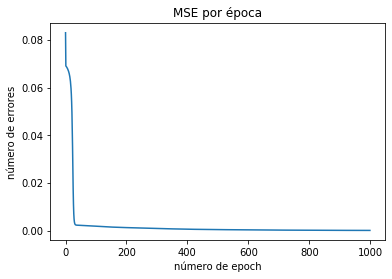

In [ ]:
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.concatenate((X1_t, X2_t ), axis = 1)
y = y_t
# DEFINIMOS LAS VARIABLES 
mu = 0.5 
epoch_count = 1000        ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 5           ## número de neuronas
hidden2_size = 5          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Conseguimos para sacar los arrays dentro de arrays que nos salen 
clf2 = [i[0][0] for i in clf]
plt.plot(clf2)
plt.title("MSE por época")
plt.ylabel("número de errores")
plt.xlabel("número de epoch")

d. Repite variando el número de neuronas por capa y la tasa de aprendizaje, usando el programa que has desarrollado. Deshaz el escalado de las predicciones con inverse_transform() y calcula el MSE entre salidas deseadas y predicciones. Comenta los resultados.

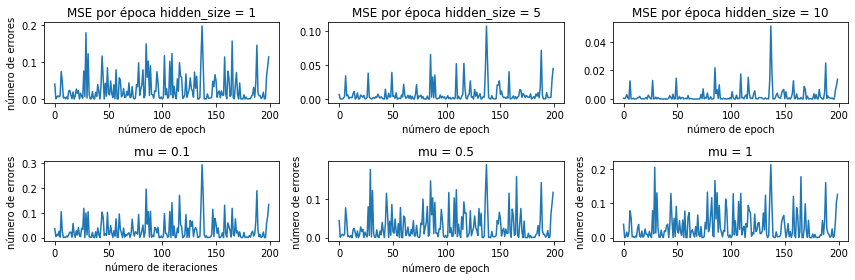

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

####################################################################################################
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.concatenate((X1_t, X2_t), axis = 1)
y = y_t
# DEFINIMOS LAS VARIABLES 
mu = 0.5 
epoch_count = 1000        ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 1           ## número de neuronas
hidden2_size = 1          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Hacemos las inversa
salida = np.array(salida).reshape(-1,1)
predicciones = mms.inverse_transform(salida)
y = mms.inverse_transform(y_t)
mse = (predicciones - y)**2
axes[0,0].plot(mse)
axes[0,0].set_title("MSE por época hidden_size = 1")
axes[0,0].set_ylabel("número de errores")
axes[0,0].set_xlabel("número de epoch")
# Cambiamos mu
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.concatenate((X1_t, X2_t), axis = 1)
y = y_t
# DEFINIMOS LAS VARIABLES 
mu = 0.1 
epoch_count = 1000        ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 1           ## número de neuronas
hidden2_size = 1          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Hacemos las inversa
salida = np.array(salida).reshape(-1,1)
predicciones = mms.inverse_transform(salida)
y = mms.inverse_transform(y_t)
mse = (predicciones - y)**2
axes[1,0].plot(mse)
axes[1,0].set_title("mu = 0.1")
axes[1,0].set_ylabel("número de errores")
axes[1,0].set_xlabel("número de iteraciones")
####################################################################################################
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.concatenate((X1_t, X2_t), axis = 1)
y = y_t
# DEFINIMOS LAS VARIABLES 
mu = 0.5 
epoch_count = 1000        ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 5           ## número de neuronas
hidden2_size = 5          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Hacemos las inversa
salida = np.array(salida).reshape(-1,1)
predicciones = mms.inverse_transform(salida)
y = mms.inverse_transform(y_t)
mse = (predicciones - y)**2
axes[0,1].plot(mse)
axes[0,1].set_title("MSE por época hidden_size = 5")
axes[0,1].set_xlabel("número de epoch")
# Cambiamos mu
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.concatenate((X1_t, X2_t), axis = 1)
y = y_t
# DEFINIMOS LAS VARIABLES 
mu = 0.5 
epoch_count = 1000        ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 1           ## número de neuronas
hidden2_size = 1          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Hacemos las inversa
salida = np.array(salida).reshape(-1,1)
predicciones = mms.inverse_transform(salida)
y = mms.inverse_transform(y_t)
mse = (predicciones - y)**2
axes[1,1].plot(mse)
axes[1,1].set_title("mu = 0.5")
axes[1,1].set_ylabel("número de errores")
axes[1,1].set_xlabel("número de epoch")
####################################################################################################
 
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.concatenate((X1_t, X2_t), axis = 1)
y = y_t
# DEFINIMOS LAS VARIABLES 
mu = 0.5 
epoch_count = 1000        ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 10          ## número de neuronas
hidden2_size = 10         ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Hacemos las inversa
salida = np.array(salida).reshape(-1,1)
predicciones = mms.inverse_transform(salida)
y = mms.inverse_transform(y_t)
mse = (predicciones - y)**2
axes[0,2].plot(mse)
axes[0,2].set_title("MSE por época hidden_size = 10")
axes[0,2].set_xlabel("número de epoch")
# Cambiamos mu
# TOMAMOS UNA ENTRADA Y UNA SALIDA
X = np.concatenate((X1_t, X2_t), axis = 1)
y = y_t
# DEFINIMOS LAS VARIABLES 
mu = 1 
epoch_count = 1000        ## para varias epocas
input_size  = 2           ## número de entradas
output_size = 1           ## número de salidas
hidden_size = 1           ## número de neuronas
hidden2_size = 1          ## número de neuronas
# LLAMAMOS AL ALGORITMO DE RETROPROPAGACIÓN 
clf, salida = MLP(X, y, mu, epoch_count, input_size, output_size, hidden_size, hidden2_size)
## Hacemos las inversa
salida = np.array(salida).reshape(-1,1)
predicciones = mms.inverse_transform(salida)
y = mms.inverse_transform(y_t)
mse = (predicciones - y)**2
axes[1,2].plot(mse)
axes[1,2].set_title("mu = 1")
axes[1,2].set_ylabel("número de errores")
axes[1,1].set_xlabel("número de epoch")
####################################################################################################

plt.tight_layout()
plt.show()